In [1]:
import numpy as np
import sys

sys.path.append('../code/')
from moped import MOPED

from time import time

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.colors as pltcol
import gc

In [2]:
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 12 # 14
mpl.rcParams['legend.labelspacing'] = 0.25
FS = 18
FS2 = 15
FS3 = 13
FSL = 22

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.minor.size'] = 3

#mpl.rcParams.keys()

# Example usage of MOPED
### based on algorithm described by [Heavens, Jiminez & Lahav (2000)](https://ui.adsabs.harvard.edu/abs/2000MNRAS.317..965H/abstract)

## Model setup

In [3]:
# model
def model(x,theta):
    """ Given x of shape (N,) and theta of shape (M,), returns polynomial of shape (N,) using theta as coefficients. """
    out = np.zeros_like(x)
    for m in range(theta.size):
        out += theta[m]*x**m
    return out

def dmudtheta(x,theta):
    """ Given x of shape (N,) and theta of shape (M,), returns polynomial derivatives of shape (M,N). """
    out = np.zeros((theta.size,x.size))
    for m in range(theta.size):
        out[m] = x**m
    return out

## Data & model derivative setup

In [14]:
Seed = 1983
rng = np.random.RandomState(Seed)

# fiducial model parameters
theta_fid = np.array([0.5,2,-1,0.2])
M = theta_fid.size

N = 50 # data size
xvals = np.linspace(-2,5,N)

# data covariance
sigma = np.linspace(0.1,0.9,N)
data_cov = sigma**2*np.eye(N)

# data
mu_fid = model(xvals,theta_fid)
data = rng.multivariate_normal(mu_fid,data_cov)

# model derivatives
dmdtheta = dmudtheta(xvals,theta_fid)

## Implement MOPED

In [15]:
data_pack = {'data':data,'dmdtheta':dmdtheta,'data_cov':data_cov}
moped = MOPED(data_pack)
# now we can access
# moped.eig_vec --> optimized, orthonormal eigenvectors
# moped.data_comp --> compressed data points
# moped.eig_unnorm --> non-optimized eigenvectors that maximize individual conditional information

## Plots

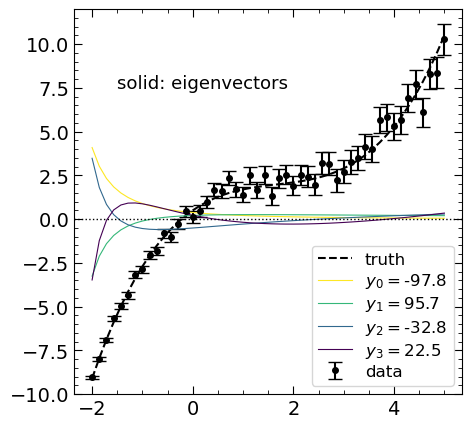

In [16]:
plt.figure(figsize=(5,5))
plt.ylim(-10,12)
plt.plot(xvals,mu_fid,'k--',label='truth')
plt.errorbar(xvals,data,yerr=sigma,ls='none',capsize=5,marker='o',markersize=4,color='k',label='data')

cols = iter(plt.cm.viridis_r(np.linspace(0,1,M)))
for m in range(M):
    col = next(cols)
    plt.plot(xvals,moped.eig_vec[m],'-',color=col,lw=0.8,label='$y_{{{0:d}}} =${1:.1f}'.format(m,moped.data_comp[m]))
plt.axhline(0.0,c='k',ls=':',lw=1)
plt.text(-1.5,7.5,'solid: eigenvectors',fontsize=FS3)
plt.minorticks_on()
plt.legend(loc='lower right')
plt.show()